In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers_df = pd.read_csv(r"D:\z\Zeotap\Customers - Customers.csv")
transactions_df = pd.read_csv(r"D:\z\Zeotap\Transactions - Transactions.csv")

In [2]:
# Merge and preprocess data
full_data = pd.merge(transactions_df, customers_df, on="CustomerID", how="left")

In [3]:
# Feature engineering: aggregate transaction data for clustering
customer_metrics = full_data.groupby("CustomerID").agg(
    total_spend=("TotalValue", "sum"),
    transaction_count=("TransactionID", "count"),
    avg_transaction_value=("TotalValue", "mean")
).reset_index()

# Normalize the data for clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_metrics.drop(columns=["CustomerID"]))

In [4]:
# Apply K-Means clustering
num_clusters = 5  # Choose the number of clusters (between 2 and 10)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_metrics["Cluster"] = kmeans.fit_predict(scaled_features)

# Calculate clustering metrics
db_index = davies_bouldin_score(scaled_features, customer_metrics["Cluster"])
silhouette_avg = silhouette_score(scaled_features, customer_metrics["Cluster"])

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [5]:
# Dimensionality reduction for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

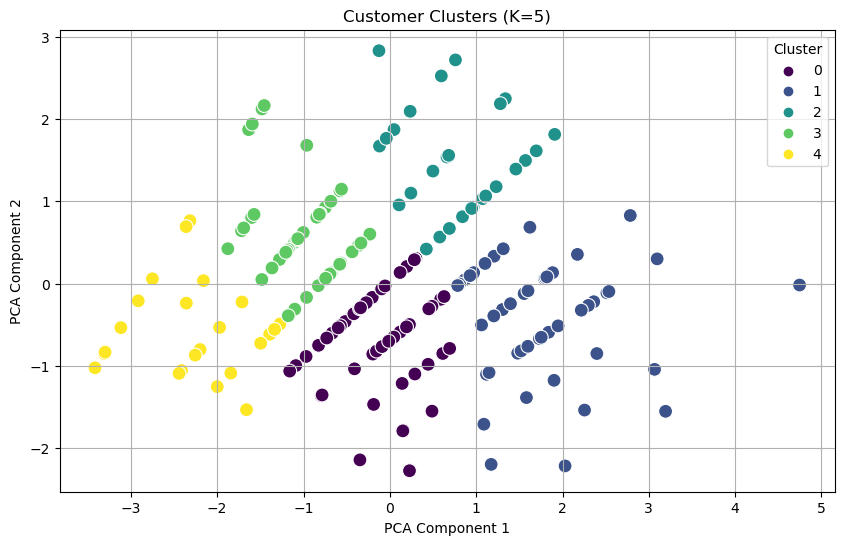

In [6]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=reduced_features[:, 0], y=reduced_features[:, 1],
    hue=customer_metrics["Cluster"], palette="viridis", s=100
)
plt.title(f"Customer Clusters (K={num_clusters})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [7]:
# Print clustering results
print("Number of clusters:", num_clusters)
print("Davies-Bouldin Index (DB Index):", db_index)
print("Silhouette Score:", silhouette_avg)

Number of clusters: 5
Davies-Bouldin Index (DB Index): 0.8393610671357156
Silhouette Score: 0.36484538478474426


In [9]:
# Save clustering results
customer_metrics.to_csv("FirstName_LastName_Clustering.pdf", index=False)
print("Customer clustering results saved to 'FirstName_LastName_Clustering.pdf'.")

Customer clustering results saved to 'FirstName_LastName_Clustering.pdf'.
